This code is meant to take the outputs of the KPZ solver and run Principal Component Analysis. The principal component can be used to extract physics parameters for different growth rates or surfaces.

In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
import sklearn.decomposition as skld

As a unit test we can generate 

In [2]:
def multivariate_Gaussian_field(mean, std, rng, shape):
    flat_field = rng.normal(loc=mean, scale=std, size=np.prod(shape))
    return flat_field.reshape(shape)


In [19]:
rng = np.random.default_rng()

time_series = []
t = 500
for x in range(t):
    time_series.append(multivariate_Gaussian_field(mean=0.0,std=1.0, rng=rng, shape=(20,20,20,20)))

print(time_series[0].shape)

(20, 20, 20, 20)


In [20]:
def reshape_time_series(ts):
    '''Using numpy to reshape the time series data into a 2D array for PCA analysis'''
    ts_arr = np.array(ts)
    return ts_arr.reshape(ts_arr.shape[0], -1)

def reshape_for_indiv_PCA(ts):
    '''Returns data reshaped along last height dimension for individual PCA analysis'''
    return [data.reshape(data.shape[0],-1) for data in ts]


time_series_arr_flattened = reshape_time_series(time_series)
timeser_arr_flat_sort = reshape_for_indiv_PCA(time_series)

print(time_series_arr_flattened.shape)
print(timeser_arr_flat_sort)

(500, 160000)
[array([[ 1.14567589, -1.5304268 , -0.71475094, ..., -0.85268447,
         0.16002254, -0.98774936],
       [ 0.62523878, -0.37734676, -0.1367542 , ..., -1.32570637,
         0.09164924,  1.32748982],
       [ 0.56121931,  1.57958893,  2.01259041, ...,  0.73006176,
         1.44852993,  1.26069107],
       ...,
       [ 0.18867438,  0.36401255,  0.09163709, ...,  2.34060456,
        -0.40417929,  0.81275311],
       [-0.8459777 ,  1.33834355, -1.45212113, ..., -0.1061866 ,
        -0.12909239,  0.17402019],
       [ 1.50975941,  2.09454006,  1.31925075, ..., -0.16048809,
         0.95034592,  0.86768721]], shape=(20, 8000)), array([[ 0.3660401 ,  0.93061848, -0.91393807, ..., -0.57494936,
        -1.08639043,  0.98685413],
       [ 0.82127219, -0.07402225,  1.18831695, ...,  0.00577521,
         0.36631656, -0.86311545],
       [-0.44817013,  1.57641291,  0.87297017, ...,  0.08767327,
        -0.8230856 , -0.16082441],
       ...,
       [ 0.75218614,  0.30307117, -0.3208

In [21]:
def perform_PCA_time_series(time_series_arr_flattened):
    '''Performs PCA on each timestep and returns eigenvectors, eigenvalues and transformed data'''
    out_eigenvecs = []
    out_eigenvals = []
    out_transformed = []
    for arr in time_series_arr_flattened:
        pca = skld.PCA(svd_solver='full')
        pca.fit(arr)
        eigenvecs = pca.components_
        eigenvals = pca.explained_variance_
        transformed = pca.transform(arr)
        out_eigenvecs.append(eigenvecs)
        out_eigenvals.append(eigenvals)
        out_transformed.append(transformed)
    return out_eigenvecs, out_eigenvals, out_transformed

pca = skld.PCA(svd_solver='full')
pca.fit(time_series_arr_flattened)

,n_components,None
,copy,True
,whiten,False
,svd_solver,'full'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [22]:
eigenvals = pca.explained_variance_

eigens, eigvals, transformed = perform_PCA_time_series(timeser_arr_flat_sort)

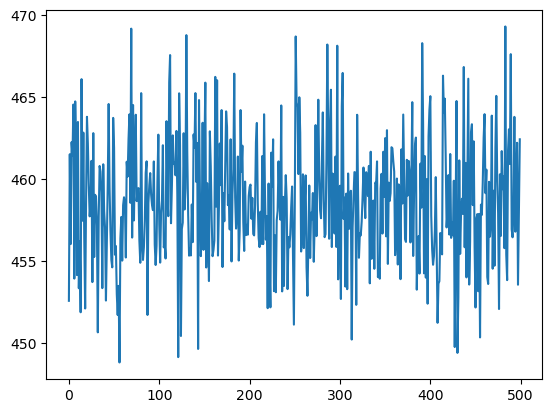

In [23]:
plt.plot([eigval[0] for eigval in eigvals])
plt.show()

(500, 160000)


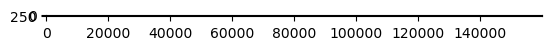

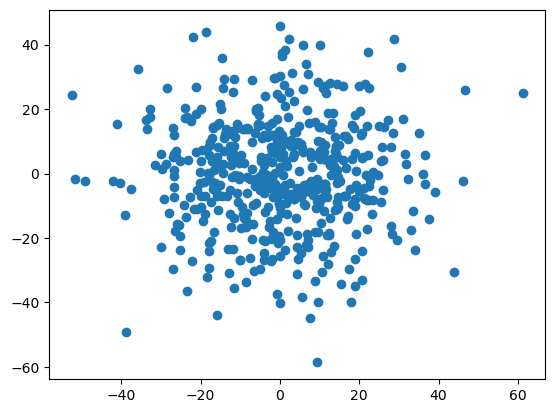

In [24]:
components = pca.transform(time_series_arr_flattened)

print(pca.components_.shape)

fig1, axs1 = plt.subplots()
axs1.imshow(pca.components_)

fig2, axs2 = plt.subplots()
axs2.scatter(components[:,488],components[:,489])

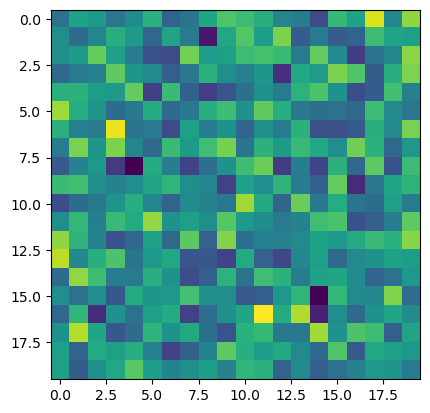

In [27]:
#Example of extracting a components and reshaping to original dimension for plotting
def reshape_components(components, original_shape):
    return [x.reshape(original_shape) for x in components]

comp1 = reshape_components(pca.components_,(20,20,20,20))

proj = np.sum(comp1[0],axis=(0,3))

plt.imshow(proj)